# Data Analysis Performance Task

## Aim and Objective 

Using this data, create a one-pager aggregating completed service types by school, give a brief narrative (1-2 paragraphs) of what the data yields based on your analysis and develop a graph that best conveys your understanding of the data. 

## Stakeholder

Social Work Managers

In [1]:
#let's import necessary liabries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

## Data Understanding

In [2]:
#read the csv file and print out the first ten rows
data = pd.read_csv("data/data analyst performance task.xlsx - Grid .csv")
data.head(5)

,ServiceType,Procedure Name,Provider Status,Provider Type,School Code,School Name,School Year,Student Status,Documentation Completed,Delivery Status,Delivered Date,Duration
0,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,11/26/18,30
1,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,10/22/18,20
2,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/07/18,20
3,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/14/18,30
4,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,09/05/18,30


In [3]:
#let's also look at the last ten rows
data.tail(5)

,ServiceType,Procedure Name,Provider Status,Provider Type,School Code,School Name,School Year,Student Status,Documentation Completed,Delivery Status,Delivered Date,Duration
47175,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,NaN,NaN,30
47176,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,30
47177,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,60
47178,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,90
47179,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,NotCompleted,NaN,30


In [4]:
#view the shape of the data
data.shape

(47180, 12)

In [5]:
#review the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47180 entries, 0 to 47179
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ServiceType              47180 non-null  object
 1   Procedure Name           47175 non-null  object
 2   Provider Status          47175 non-null  object
 3   Provider Type            47175 non-null  object
 4   School Code              35182 non-null  object
 5   School Name              35182 non-null  object
 6   School Year              47175 non-null  object
 7   Student Status           35182 non-null  object
 8   Documentation Completed  47175 non-null  object
 9   Delivery Status          43227 non-null  object
 10  Delivered Date           33513 non-null  object
 11  Duration                 47175 non-null  object
dtypes: object(12)
memory usage: 4.3+ MB


In [6]:
#statistic summary of data
data.describe()

,ServiceType,Procedure Name,Provider Status,Provider Type,School Code,School Name,School Year,Student Status,Documentation Completed,Delivery Status,Delivered Date,Duration
count,47180,47175,47175,47175,35182,35182,47175,35182,47175,43227,33513,47175
unique,11,76,2,2,118,118,2,3,3,11,177,186
top,Student Activity,Consultation with Staff/Parent,Active,Social Work,454,Cardozo EC,2018-19,ACTIVE,YES,Completed,12/05/18,30
freq,25744,4840,47170,47170,2093,2093,47170,34362,33508,33089,567,16655


In [7]:
#check the unique values in Service Type
data['ServiceType'].unique()

array(['Student Activity', 'Consultation and Training', 'ServiceType',
       'Direct Services & Treatment', 'EBT Service', 'RTI Service',
       '504 Service', 'Activity', 'Documentation of Services',
       'Meeting Prep/Participation', 'School-Specific Support'],
      dtype=object)

The service type have ten different unique values.

In [8]:
#check the unique values in School names
data['School Name'].unique()

array(['Tubman ES', 'Hyde-Addison ES', 'J.O. Wilson ES', 'Garrison ES',
       'Amidon-Bowen ES', 'Malcolm X ES @ Green', 'Ketcham ES',
       'Dorothy I. Height ES', 'Deal MS', 'Wheatley EC', 'Seaton ES',
       'Browne EC', 'Bunker Hill ES', 'Lawrence E. Boone ES',
       'Watkins ES (Capitol Hill Clus)', 'Hearst ES', 'Wilson HS',
       'Coolidge HS', 'Peabody ES (Capitol Hill Clus)', 'Maury ES',
       'Eastern HS', 'Lafayette ES', 'Roosevelt High School',
       'Brightwood EC', 'LaSalle-Backus EC', 'Van Ness ES',
       'Cleveland ES', 'Turner ES', 'Simon ES', 'Bancroft ES',
       'Barnard ES', 'Aiton ES', 'Luke Moore Alternative HS',
       'Hendley ES', 'Columbia Heights EC (CHEC)',
       'Washington Metropolitan HS', 'Drew ES', 'Plummer ES',
       'Benjamin Banneker HS', 'River Terrace', 'Jefferson MS Academy',
       'McKinley MS', 'C.W. Harris ES', 'MacFarland MS',
       'Woodson, H.D. HS', 'SWW @ Francis Stevens',
       'McKinley Technology HS', 'Youth Services Center'

We have one hundred and seventeen unique schools in the dataset

In [9]:
#check the unique values in Delivery Status
data['Delivery Status'].unique()

array(['Completed', nan, 'Not Completed', 'Delivery Status', 'Delivered',
       'Absent - Student', 'Student Unavailable', 'Consultation',
       'Refused - Student', 'School Closure', 'Unavailable - Provider',
       'NotCompleted'], dtype=object)

We also have ten delivery status for the service type.

In [10]:
#check if there are null values in the data
data.isnull().sum()

ServiceType                    0
Procedure Name                 5
Provider Status                5
Provider Type                  5
School Code                11998
School Name                11998
School Year                    5
Student Status             11998
Documentation Completed        5
Delivery Status             3953
Delivered Date             13667
Duration                       5
dtype: int64

Text(0, 0.5, 'Number of entries')

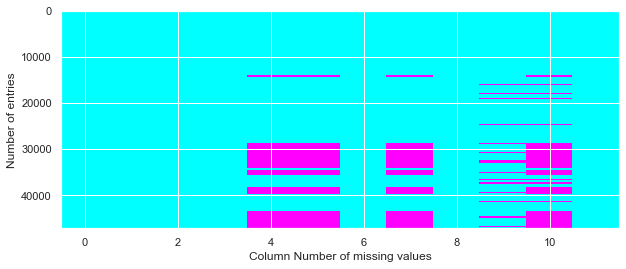

In [11]:
#plot the null values
sns.set(font_scale=1)
plt.figure(figsize=(10,4))
plt.imshow(data.isna(), aspect="auto", 
           interpolation="nearest",cmap ="cool")
plt.xlabel("Column Number of missing values")
plt.ylabel("Number of entries")

looking at the image we can see that there is a lot of missing values in the dataset.

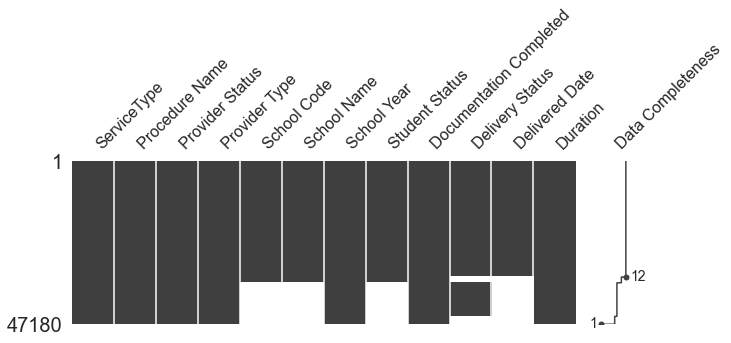

In [12]:
#lets use the missingno liabrary to get the features with missing values
msno.matrix(data,labels=True,sort="descending", figsize=(10,3));

Looking at the graph, you can see that some of the feature columns are missing some values. when those values are sum, it shows that there are 11,998 null values in School Code, School Name, and School Status. Also there are 5 null values in Procedure Name, Provider Type, School Year, Documentation Completed and Duration. There is also 13667 null values in the Delivery Date and 3953 null values in Delivery Status.

In [13]:
#let's filter through the columns we will be working with
data_filter = data[data['Delivery Status'] == 'Completed']
data_filter.head(5)

,ServiceType,Procedure Name,Provider Status,Provider Type,School Code,School Name,School Year,Student Status,Documentation Completed,Delivery Status,Delivered Date,Duration
0,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,11/26/18,30
1,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,10/22/18,20
2,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/07/18,20
3,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/14/18,30
4,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,09/05/18,30


In [14]:
#check the shape of the data_filter
data_filter.shape

(33089, 12)

In [15]:
#check the how many null values we have after filtering for the completed service type
data_filter.isnull().sum()

ServiceType                   0
Procedure Name                0
Provider Status               0
Provider Type                 0
School Code                9204
School Name                9204
School Year                   0
Student Status             9204
Documentation Completed       0
Delivery Status               0
Delivered Date             9204
Duration                      0
dtype: int64

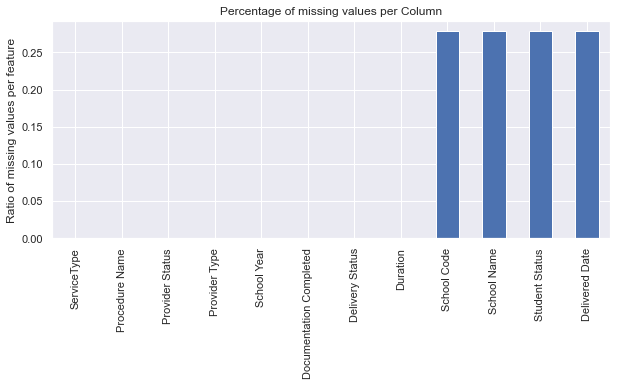

In [16]:
#let's plot the null values as a percentage
sns.set(font_scale=1)
data_filter.isna().mean().sort_values().plot(kind ='bar',
                                             figsize=(10,4),title ="Percentage of missing values per Column",
                                             ylabel="Ratio of missing values per feature");

As you can see on the graph above, The school code, School Name, Student Status and the Delivery date are missing 25% of information even though the service type is completed.

In [17]:
#check the unique values of service type that is completed
data_filter[['ServiceType','Delivery Status','School Name','Provider Type','Procedure Name']].nunique() 

ServiceType          2
Delivery Status      1
School Name        117
Provider Type        1
Procedure Name      48
dtype: int64

Here it shows that only two out of ten Service type was completed for the one hundred and sixteen schools. Also it shows that out of the completed service type the provider is one and they perform forty eight different procedures. Now let's check the name of the service Type.

In [18]:
#check the names of the service type
data_filter['ServiceType'].unique()

array(['Student Activity', 'Activity'], dtype=object)

The two service type that was completed are Student Activity and Activity.

In [19]:
#check the name of the provider type
data_filter['Provider Type'].unique()

array(['Social Work'], dtype=object)

In [20]:
#confirm how many school 
data_filter['School Name'].nunique()

117

Social Work is the top provider of the service type that was completed by the schools. Now let's group the service type by school.

In [21]:
#Aggregating the completed service type by school name 
result = data_filter.groupby(['School Name','Delivery Status','Provider Type'],as_index=False)[['ServiceType']].agg('count')
result.sort_values(by='School Name')
result.reset_index(drop=True,inplace=True)
result.head(5)

,School Name,Delivery Status,Provider Type,ServiceType
0,Aiton ES,Completed,Social Work,73
1,Amidon-Bowen ES,Completed,Social Work,189
2,Anacostia HS,Completed,Social Work,406
3,Ballou HS,Completed,Social Work,152
4,Ballou STAY,Completed,Social Work,86


In [22]:
result.tail(5)

,School Name,Delivery Status,Provider Type,ServiceType
112,Wheatley EC,Completed,Social Work,197
113,Whittier EC,Completed,Social Work,195
114,Wilson HS,Completed,Social Work,606
115,"Woodson, H.D. HS",Completed,Social Work,125
116,Youth Services Center,Completed,Social Work,78


In [23]:
result['ServiceType'].sum()

23885

we are only able to aggregate 23,885 records with completed service type.

In [24]:
#checking if the service type Activity is present in the result dataframe
#the activity service type have null values for school names.
Activity = result.ServiceType == 'Activity'
Activity

0      False
1      False
2      False
3      False
4      False
       ...  
112    False
113    False
114    False
115    False
116    False
Name: ServiceType, Length: 117, dtype: bool

All the completed Service type 'Activity' does not have a school name. The column have a missing values,therefore it is not included in the analysis because we don't have a school name assign to each of the service. 

In [25]:
#check if the school name is duplicated
result.duplicated().any()

False

In [26]:
#check the total service type that was completed
result.sum()

School Name        Aiton ESAmidon-Bowen ESAnacostia HSBallou HSBa...
Delivery Status    CompletedCompletedCompletedCompletedCompletedC...
Provider Type      Social WorkSocial WorkSocial WorkSocial WorkSo...
ServiceType                                                    23885
dtype: object

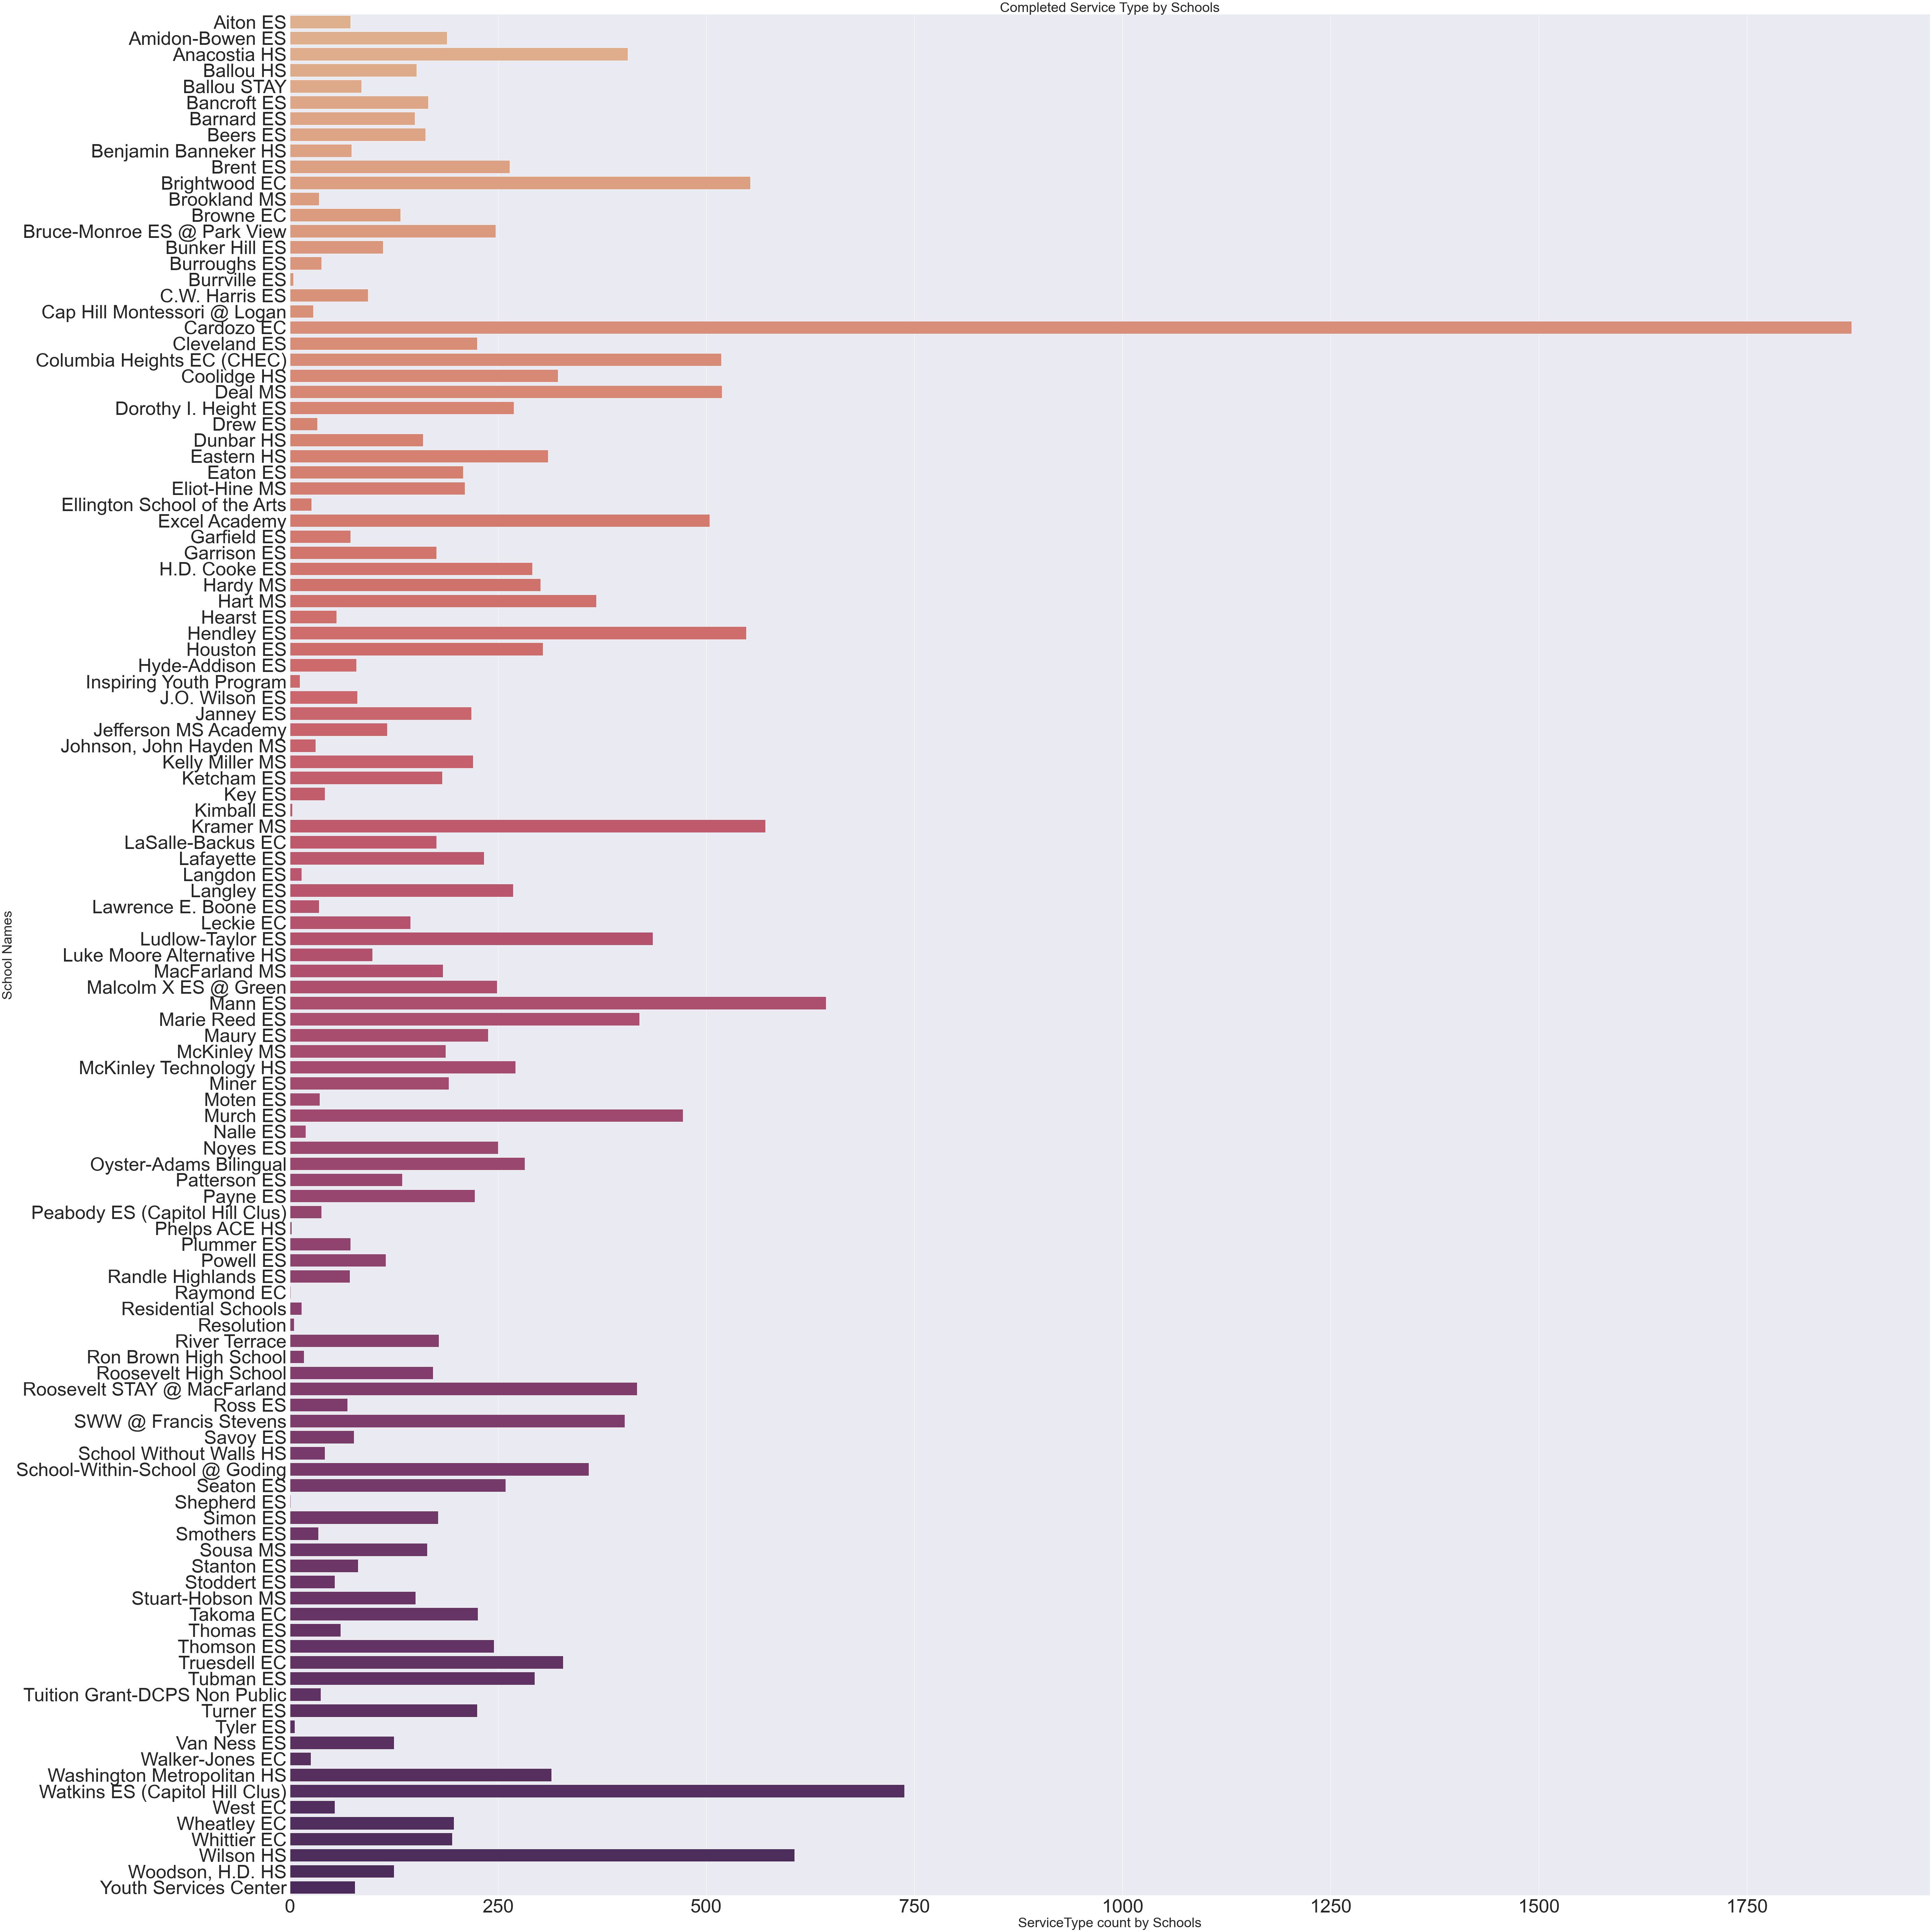

In [27]:
sns.set(font_scale=5)
plt.figure(figsize=(80,80))
graph = sns.barplot(x=result['ServiceType'], y =result['School Name'], palette='flare',)
fig=graph.get_figure()
graph.set_xlabel(xlabel='ServiceType count by Schools', fontsize=40)
graph.set_ylabel(ylabel='School Names', fontsize=40)
graph.set_title('Completed Service Type by Schools',fontsize=40)
plt.tight_layout()
plt.show()
fig.savefig('Graph.png');

In [28]:
#check the school with the maximum completed service Type
print(result[result.ServiceType == result.ServiceType.max()])

   School Name Delivery Status Provider Type  ServiceType
19  Cardozo EC       Completed   Social Work         1876


In [29]:
#check the school with the minimum copleted service type
print(result[result.ServiceType == result.ServiceType.min()])

    School Name Delivery Status Provider Type  ServiceType
79   Raymond EC       Completed   Social Work            1
92  Shepherd ES       Completed   Social Work            1


In [30]:
#check the median value
print(result[result.ServiceType == result.ServiceType.median()])

   School Name Delivery Status Provider Type  ServiceType
5  Bancroft ES       Completed   Social Work          166


In [31]:
#now let's look at the procedure that was completed by schools the split it
data['Procedure Name'] = data['Procedure Name'].str.split(',')
data = data.explode('Procedure Name')
data

,ServiceType,Procedure Name,Provider Status,Provider Type,School Code,School Name,School Year,Student Status,Documentation Completed,Delivery Status,Delivered Date,Duration
0,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,11/26/18,30
1,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,10/22/18,20
2,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/07/18,20
3,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/14/18,30
4,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,09/05/18,30
...,...,...,...,...,...,...,...,...,...,...,...,...
47175,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,NaN,NaN,30
47176,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,30
47177,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,60
47178,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,90


In [32]:
#filter the data by completed
new_filter=data[data['Delivery Status'] == 'Completed']
new_filter

,ServiceType,Procedure Name,Provider Status,Provider Type,School Code,School Name,School Year,Student Status,Documentation Completed,Delivery Status,Delivered Date,Duration
0,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,11/26/18,30
1,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,10/22/18,20
2,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/07/18,20
3,Student Activity,Observation,Active,Social Work,252,Hyde-Addison ES,2018-19,ACTIVE,YES,Completed,11/14/18,30
4,Student Activity,Observation,Active,Social Work,328,Tubman ES,2018-19,ACTIVE,YES,Completed,09/05/18,30
...,...,...,...,...,...,...,...,...,...,...,...,...
47173,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,15
47174,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,30
47176,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,30
47177,Activity,Arrival Duty,Active,Social Work,NaN,NaN,2018-19,NaN,NO,Completed,NaN,60


In [33]:
#summary of the new filtered data
new_filter.describe()

,ServiceType,Procedure Name,Provider Status,Provider Type,School Code,School Name,School Year,Student Status,Documentation Completed,Delivery Status,Delivered Date,Duration
count,37154,37154,37154,37154,25940,25940,37154,25940,37154,37154,25940,37154
unique,2,51,1,1,117,117,1,2,2,1,175,182
top,Student Activity,Consultation with Staff/Parent,Active,Social Work,454,Cardozo EC,2018-19,ACTIVE,YES,Completed,12/05/18,30
freq,25940,4632,37154,37154,1926,1926,37154,25256,25940,37154,404,11489


In [34]:
#check for null values
new_filter.isnull().sum()

ServiceType                    0
Procedure Name                 0
Provider Status                0
Provider Type                  0
School Code                11214
School Name                11214
School Year                    0
Student Status             11214
Documentation Completed        0
Delivery Status                0
Delivered Date             11214
Duration                       0
dtype: int64

In [35]:
#count the procedures completed by the school name
result_new = new_filter.groupby(['ServiceType','Delivery Status','Provider Type','Procedure Name'],as_index=False)[['School Name']].agg('count')
result_new.sort_values(by='School Name')
result_new.reset_index(drop=True,inplace=True)
result_new

,ServiceType,Delivery Status,Provider Type,Procedure Name,School Name
0,Activity,Completed,Social Work,etc),0
1,Activity,Completed,Social Work,field trip,0
2,Activity,Completed,Social Work,Arrival Duty,0
3,Activity,Completed,Social Work,Attendance,0
4,Activity,Completed,Social Work,Breakfast Duty,0
5,Activity,Completed,Social Work,Classroom Coverage,0
6,Activity,Completed,Social Work,Dismissal Duty,0
7,Activity,Completed,Social Work,Documentation of Services,0
8,Activity,Completed,Social Work,Front Desk Coverage,0
9,Activity,Completed,Social Work,Hall Monitoring Duty,0


In [36]:
#since I will not be looking at the data without school name, lets remove them by filtering.
result_new_names = result_new[result_new['School Name'] > 0]
result_new_names.reset_index(drop=True,inplace=True)
result_new_names.head(5)

,ServiceType,Delivery Status,Provider Type,Procedure Name,School Name
0,Student Activity,Completed,Social Work,Analyze Existing Data and Plan Development,2055
1,Student Activity,Completed,Social Work,504 Meeting,413
2,Student Activity,Completed,Social Work,Assessment,2055
3,Student Activity,Completed,Social Work,Attendance Intervention,676
4,Student Activity,Completed,Social Work,CFSA Hotline Report,330


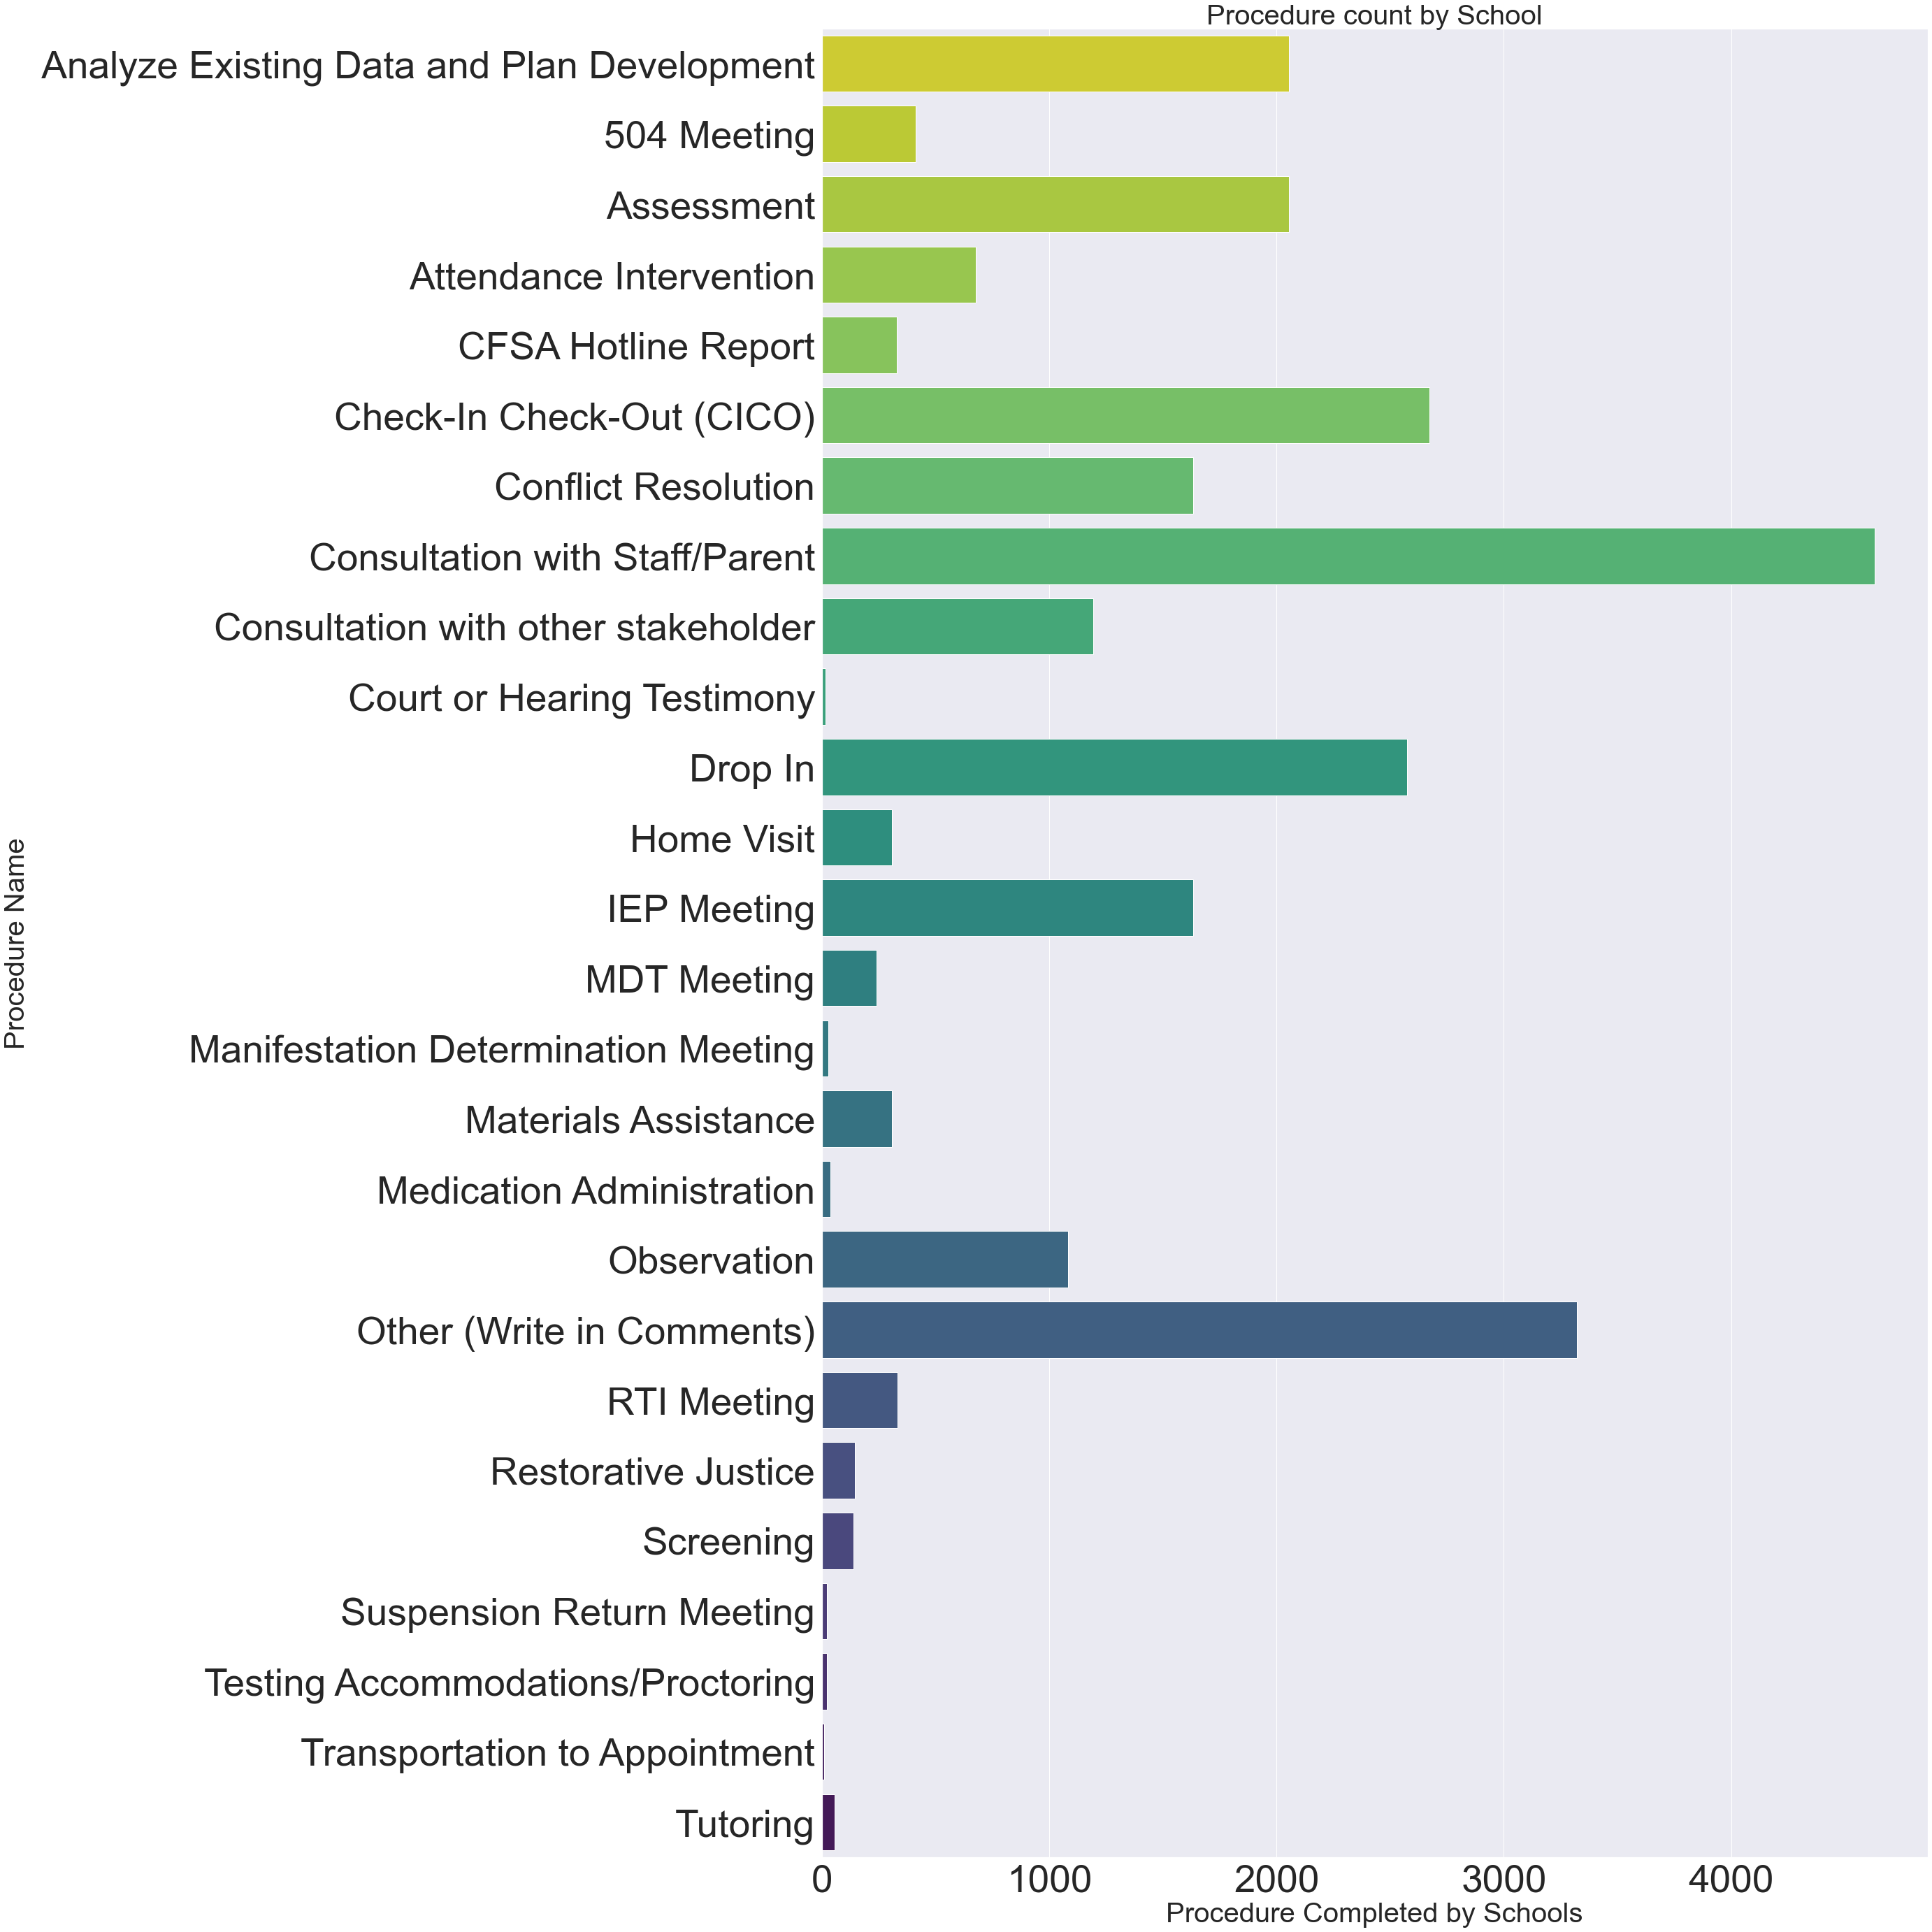

In [37]:
#plot the data so that we can see the names of the produres
sns.set(font_scale=5)
plt.figure(figsize=(40,40))
graph = sns.barplot(x=result_new_names['School Name'], y =result_new_names['Procedure Name'], palette='viridis_r',)
fig=graph.get_figure()
graph.set_xlabel(xlabel='Procedure Completed by Schools', fontsize=40)
graph.set_ylabel(ylabel='Procedure Name', fontsize=40)
graph.set_title('Procedure count by School',fontsize=40)
plt.tight_layout()
plt.show()
fig.savefig('Graph_new.png');

# Conclusion

Dataset contains 47,180rows and 12 columns. The dataset consists of  25% null values. However, 70% of the service type have been completed by the school. The two completed service types are Activity and Student Activity. 
Out of the record completed, The activity service type has 28% values and all are missing the school names. Meanwhile, Student Activity consists of 72%  values with each having a school name. 
 
There are 117 schools that have completed the Student Activity service type and the provider is social work. Cardozo EC has the maximum completed Service type with a value of 1,876 Student Activity. while Raymond EC and Shepherd ES completed the minimum service type.

The top procedure performed based on the completed service type is Consultation with staff/ parent.
